# Segmentação de Clientes

## Contexto do Notebook

Neste notebook, conduzirei uma análise exploratória de dados (EDA) com o objetivo de extrair insights valiosos sobre o comportamento dos clientes de um banco em relação ao uso de cartão de crédito. Em seguida, irei desenvolver um modelo preditivo utilizando o algoritmo K-means, com foco na segmentação dos clientes em grupos distintos. Essa segmentação permitirá ao banco otimizar seus ganhos financeiros por meio de campanhas de marketing personalizadas para cada grupo. Cada etapa do processo será abordada detalhadamente, com a explicação das razões por trás de cada decisão tomada, visando garantir uma análise sólida e resultados significativos.

- Objetivos do Notebook

1. Realizar uma análise exploratória de dados para descobrir insights sobre os padrões dos clientes de um banco com base em seu comportamento de uso de cartão de crédito.

2. Segmentar os clientes em grupos distintos para potencializar os ganhos financeiros do banco por meio de campanhas personalizadas.

3. Abordar detalhadamente cada etapa do processo, explicando as razões por trás de cada decisão tomada.

- Resultados Esperados

Espera-se obter uma segmentação eficaz dos clientes, permitindo ao banco direcionar campanhas de marketing mais eficazes e personalizadas. Isso pode resultar em um aumento significativo nos ganhos financeiros, além de melhorar a experiência do cliente e a fidelização.



## Importação das bibliotecas e base de dados

- Dados: https://www.kaggle.com/arjunbhasin2013/ccdata

In [1]:
# Visualização e Manipulação dos Dados
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Ignorar os avisos para exibir apenas os gráficos
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Importação da base de dados
base_original = pd.read_csv('/content/Marketing_data.csv')

Para aprimorar a análise do método de machine learning, vou criar uma cópia da base original na variável 'base'. Nessa cópia, planejo excluir os dados de identificação dos clientes. Ao finalizar essa etapa, precisarei dos dados originais para identificar cada cliente.

In [4]:
# Criando uma cópia da base original
base = base_original.copy()

In [5]:
# Verifiando o tamanho da dataset
base.shape

(8950, 18)

In [6]:
# Observação geral do dataset
base.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
# Obtendo informações sobre os tipos de atributos do dataset
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

 **Atributos Categóricos (object)**:
- **CUST_ID**: Identificação do titular do cartão de crédito


 **Atributos Numéricos (float64)**:
- **BALANCE**: Valor do saldo restante na conta para fazer compras
- **BALANCE_FREQUENCY**: Frequência com que o saldo é atualizado
- **PURCHASES**: Valor total das compras feitas
- **ONEOFF_PURCHASES**: Valor máximo de compra em uma única vez
- **INSTALLMENTS_PURCHASES**: Valor total das compras parceladas
- **CASH_ADVANCE**: Valor do adiantamento em dinheiro dado pelo usuário
- **PURCHASES_FREQUENCY**: Frequência das compras
- **ONEOFF_PURCHASES_FREQUENCY**: Frequência das compras em uma única vez
- **PURCHASES_INSTALLMENTS_FREQUENCY**: Frequência das compras parceladas
- **CASH_ADVANCE_FREQUENCY**: Frequência do adiantamento em dinheiro
- **CREDIT_LIMIT**: Limite de crédito do cartão
- **PAYMENTS**: Valor total dos pagamentos feitos
- **MINIMUM_PAYMENTS**: Valor mínimo dos pagamentos feitos
- **PRC_FULL_PAYMENT**: Percentual de pagamento total feito pelo usuário


 **Atributos Inteiros (int64)**:
- **CASH_ADVANCE_TRX**: Número de transações de adiantamento em dinheiro
- **PURCHASES_TRX**: Número de transações de compras
- **TENURE**: Tempo de serviço do cartão de crédito para o usuário


In [8]:
# Informações estatísticas gerais sobre os dados
base.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## Visualização e tratamento dos dados

Vou verificar a existência de dados duplicados ou nulos, pois essas informações podem comprometer a criação do modelo e a análise dos dados.

In [9]:
#Verificando duplicatas
base.duplicated().sum()

0

In [10]:
#Verificando dados nulos
base.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Vou tratar as colunas 'MINIMUM_PAYMENTS' e 'CREDIT_LIMIT', substituindo os valores nulos pela mediana. Optei pela mediana em vez de outras métricas, como a média, pois a mediana é menos sensível a valores extremos e não afeta tanto a distribuição dos dados.

In [11]:
# Descobrindo a mediana da coluna 'MINIMUM_PAYMENTS' para substituir os valores nulos
base['MINIMUM_PAYMENTS'].median()

312.343947

In [12]:
#Substituindo
base.loc[(base['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = base['MINIMUM_PAYMENTS'].median()

In [13]:
#Descobrindo a mediana da coluna 'CREDIT_LIMIT' para substituir os valores nulos
base['CREDIT_LIMIT'].median()

3000.0

In [14]:
#Substituindo
base.loc[(base['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = base['CREDIT_LIMIT'].mean()

In [15]:
#Conferindo
base.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [16]:
# Excluindo a coluna 'CUST_ID' que não irá influenciar na análise. Essa coluna serve apenas para identificação do cliente
base.drop('CUST_ID', axis = 1, inplace = True)

In [17]:
# Conferindo a exclusão
base.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

Vou gerar alguns histogramas para visualizar a distribuição das variáveis em nosso conjunto de dados. Em seguida, farei um gráfico mostrando a correlação entre os atributos para obter insights sobre como as variáveis se relacionam entre si.

array([[<Axes: title={'center': 'BALANCE'}>,
        <Axes: title={'center': 'BALANCE_FREQUENCY'}>,
        <Axes: title={'center': 'PURCHASES'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES'}>],
       [<Axes: title={'center': 'INSTALLMENTS_PURCHASES'}>,
        <Axes: title={'center': 'CASH_ADVANCE'}>,
        <Axes: title={'center': 'PURCHASES_FREQUENCY'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<Axes: title={'center': 'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_TRX'}>,
        <Axes: title={'center': 'PURCHASES_TRX'}>],
       [<Axes: title={'center': 'CREDIT_LIMIT'}>,
        <Axes: title={'center': 'PAYMENTS'}>,
        <Axes: title={'center': 'MINIMUM_PAYMENTS'}>,
        <Axes: title={'center': 'PRC_FULL_PAYMENT'}>],
       [<Axes: title={'center': 'TENURE'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

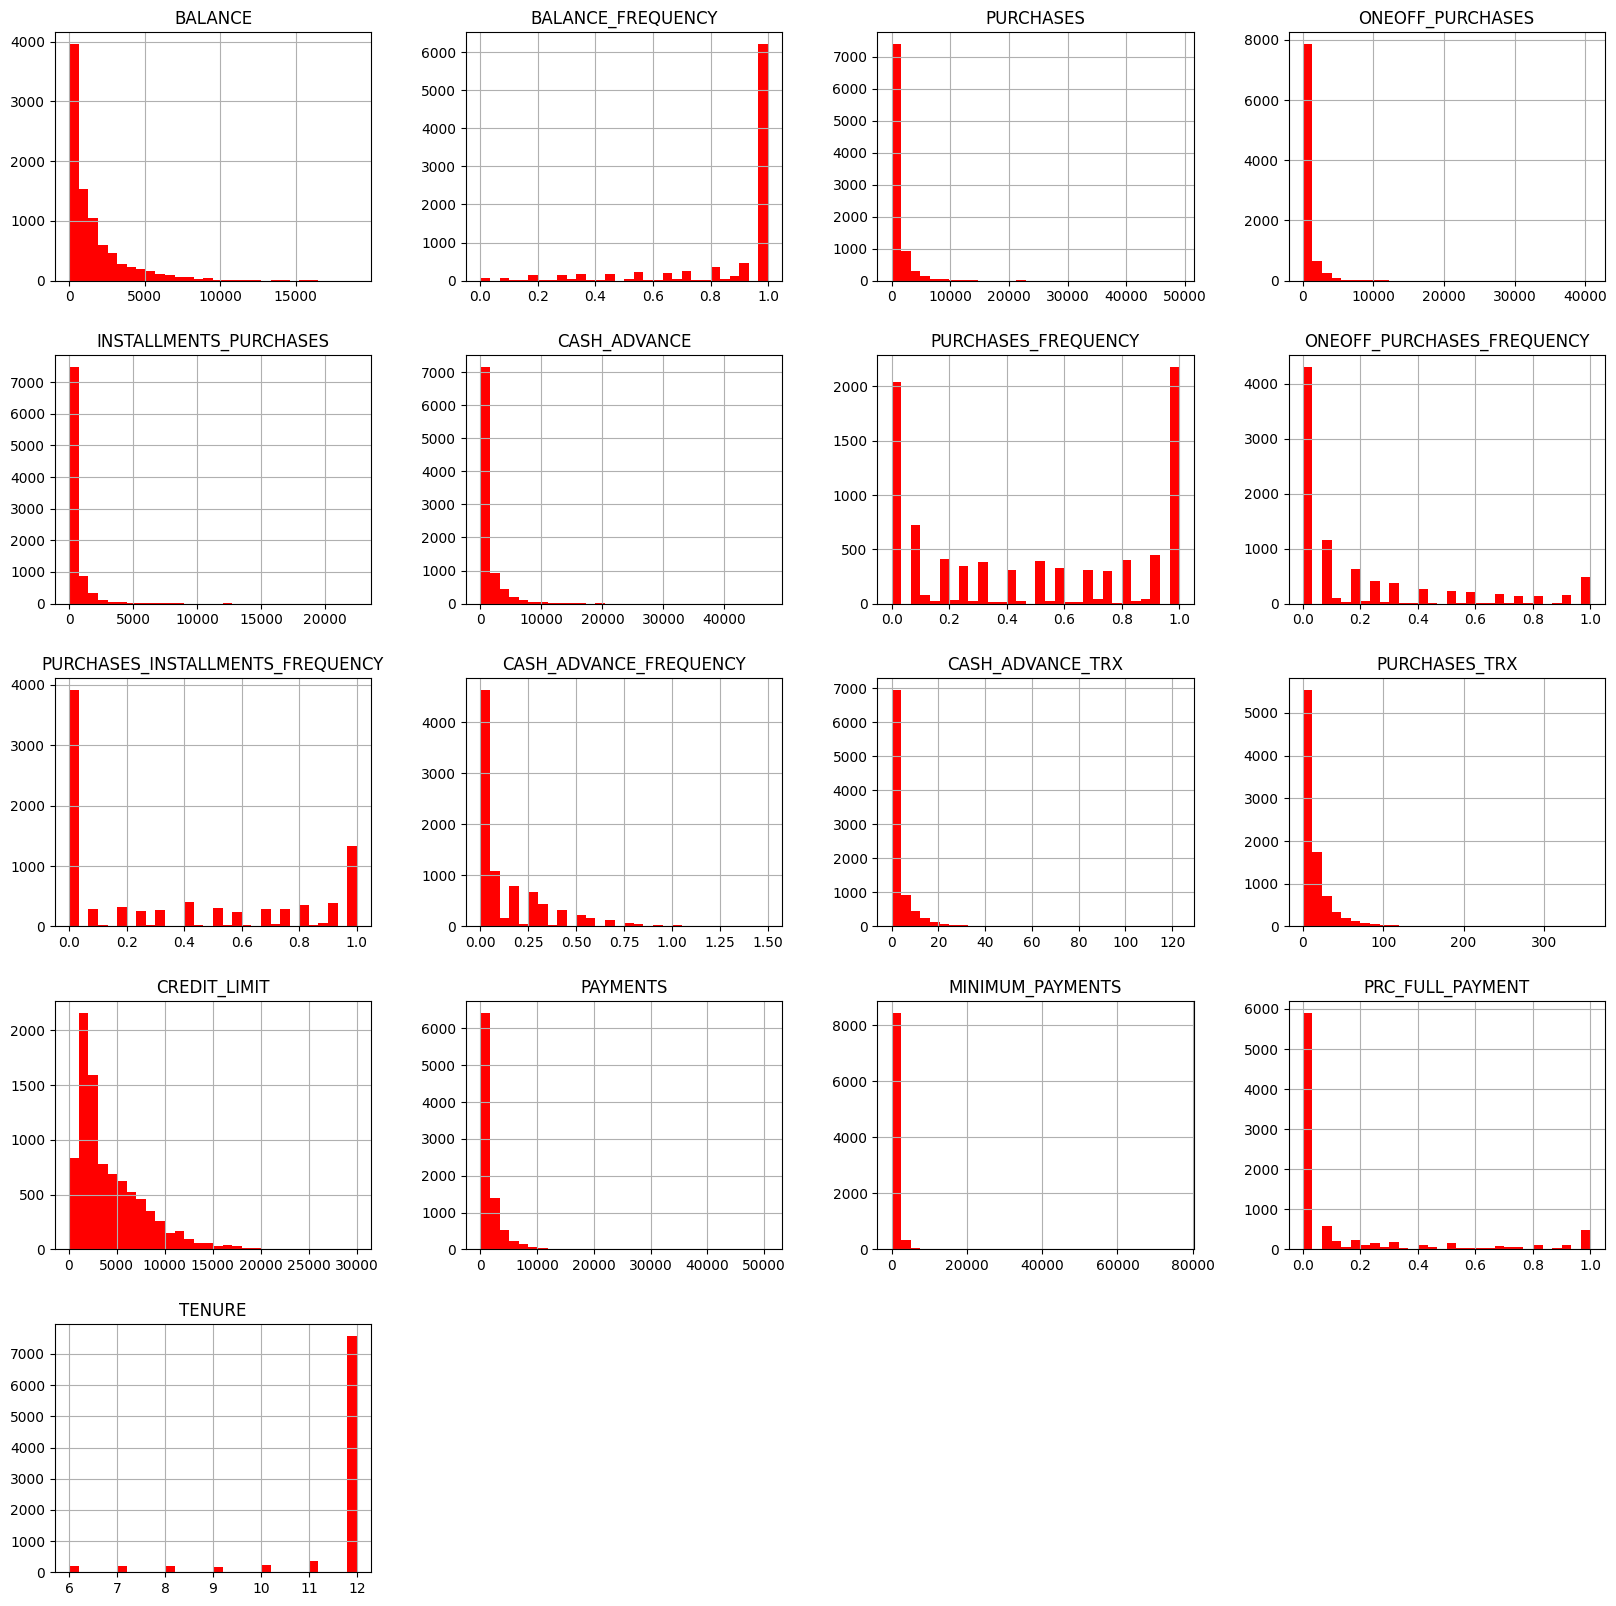

In [18]:
# Gerando os histogramas
base.hist(bins=30, figsize=(20, 20), color='r')

<Axes: >

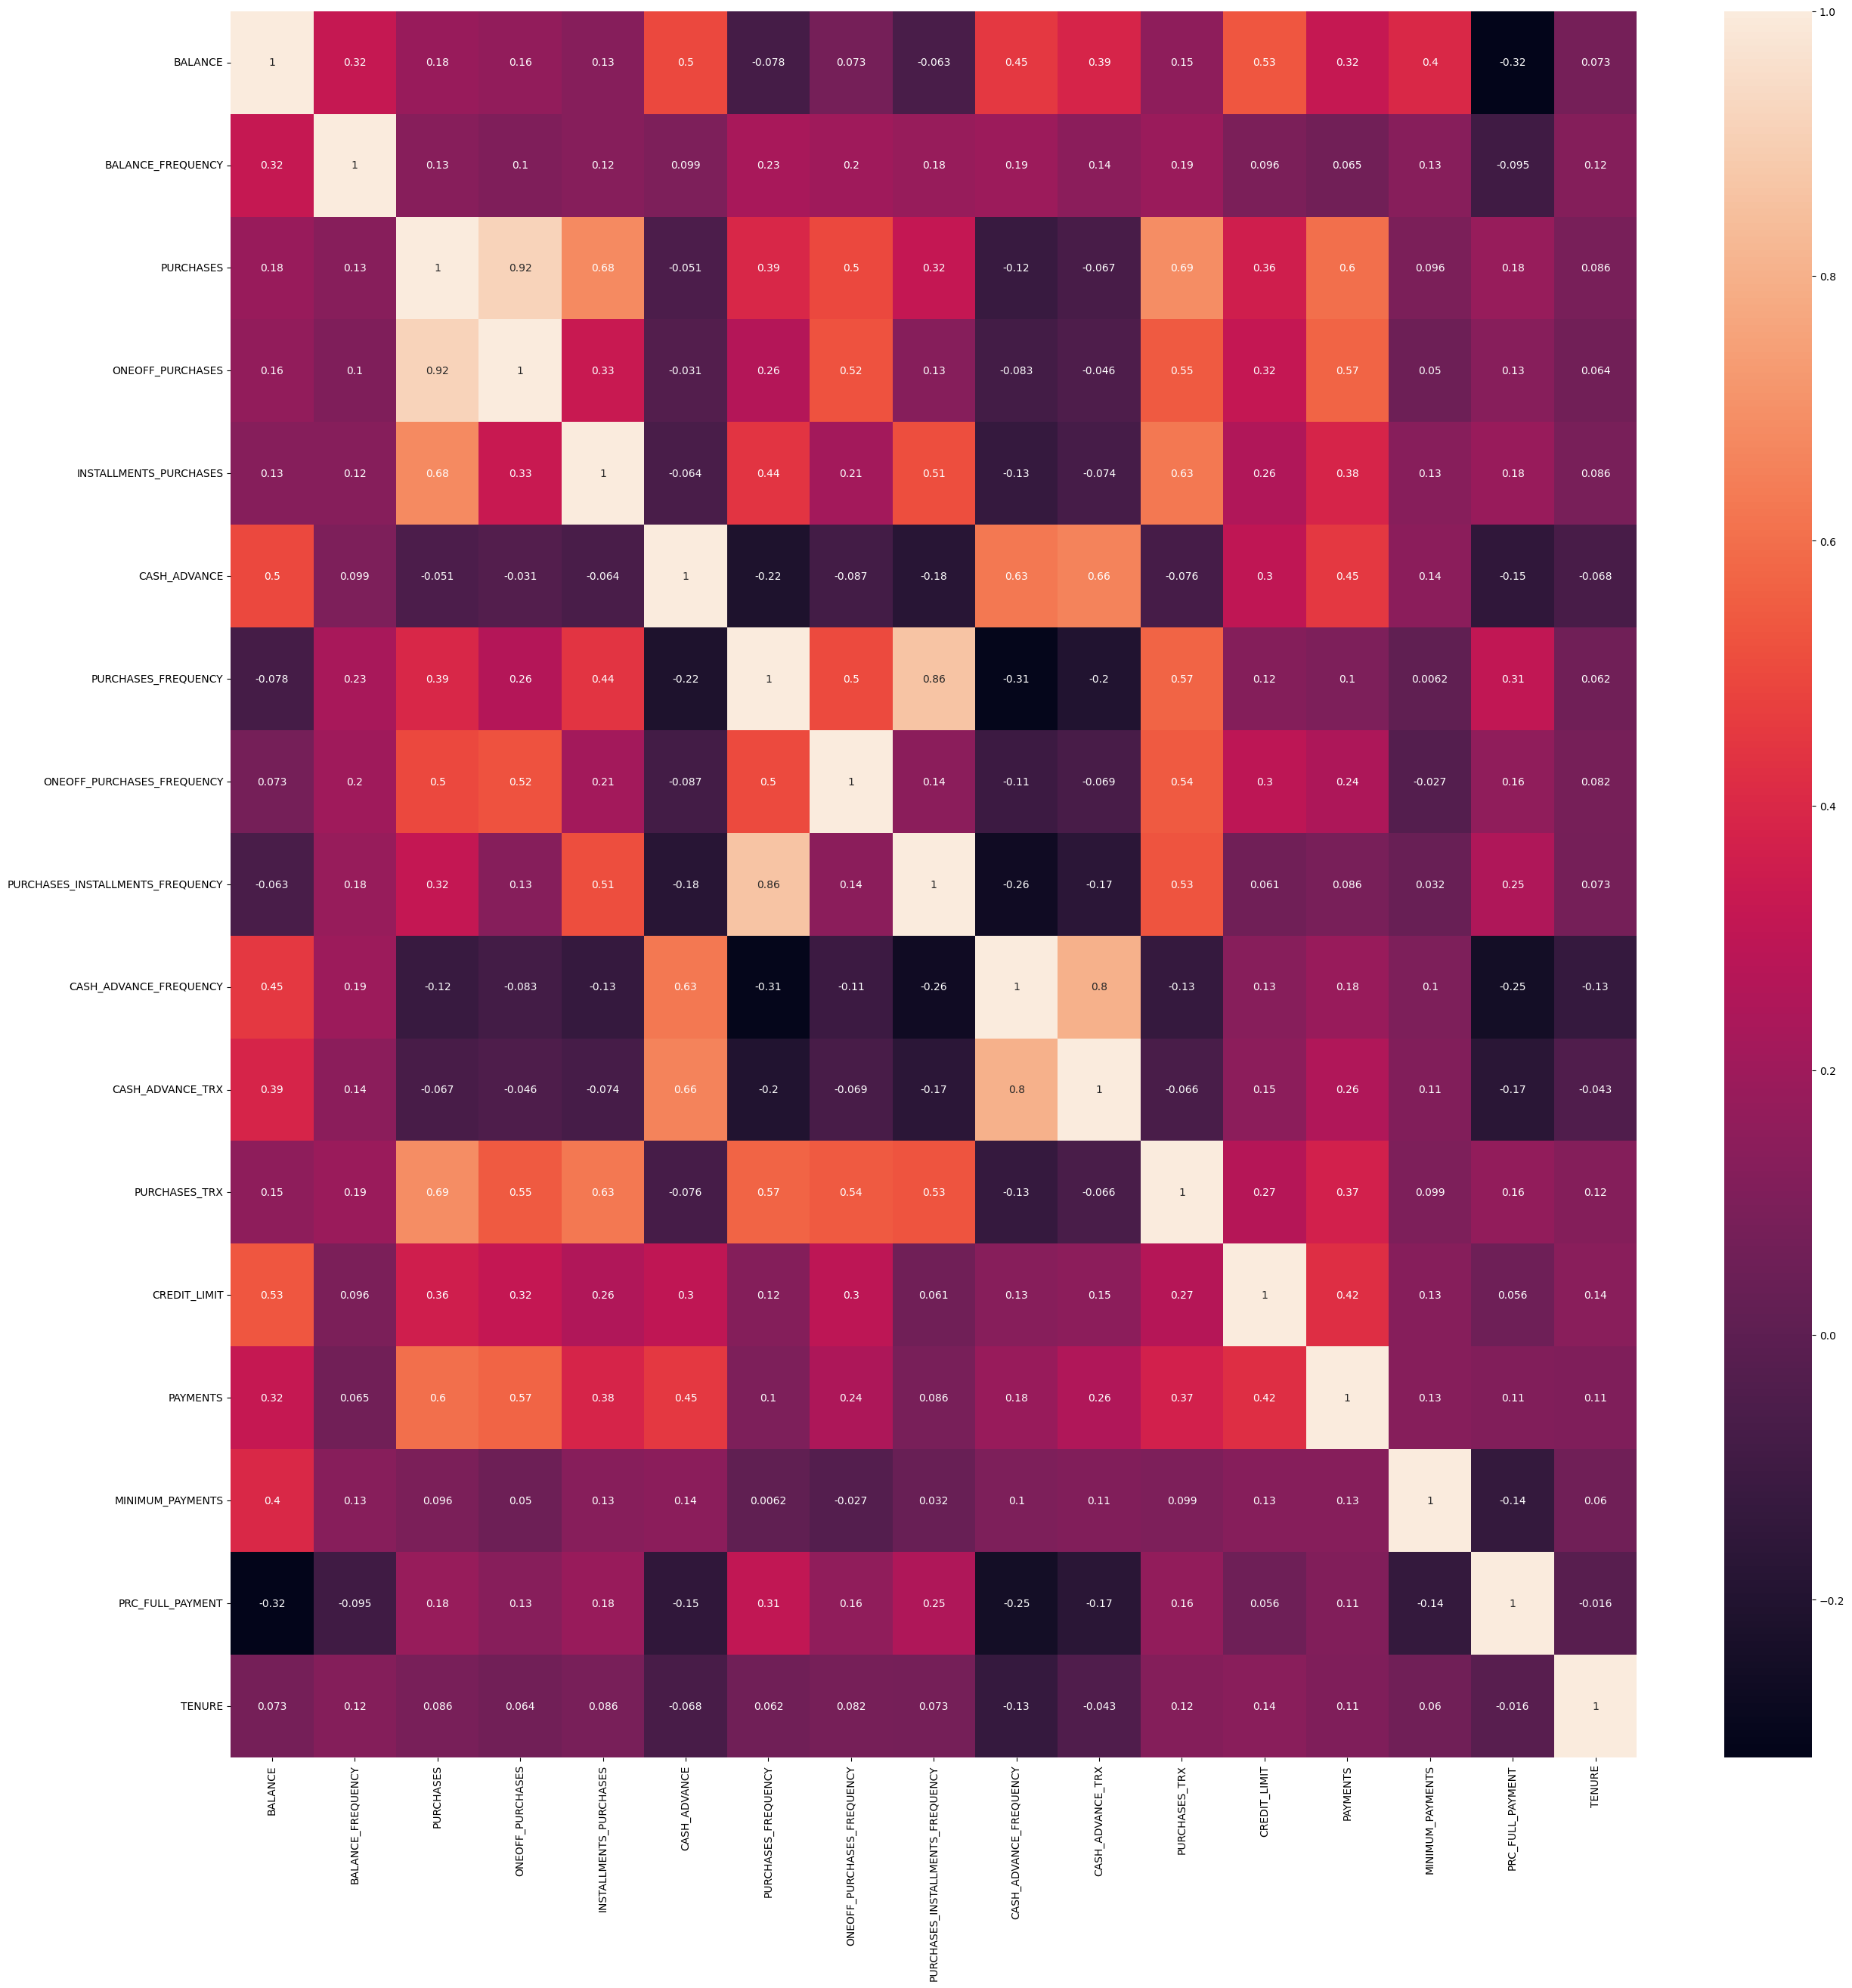

In [19]:
# Vendo as correlações entre os atributos
correlacoes = base.corr()
fig, eixo = plt.subplots(figsize = (30,30))
sns.heatmap(correlacoes, annot = True)

### Insights sobre as correlações


## Definindo o número de Clusters

Irei criar um modelo K-Means para definir o número de clusters usando o método do cotovelo. Esta abordagem me permitirá escolher um número adequado de clusters com base na análise visual do gráfico de cotovelo.


No método do cotovelo, calculamos a soma dos quadrados das distâncias entre os pontos de dados e os centróides de seus clusters mais próximos para diferentes valores de k (número de clusters). Em seguida, plotamos essas somas em função de k. O objetivo é encontrar o ponto onde a curva começa a formar um "cotovelo". Esse ponto indica o número ideal de clusters, pois adicionando mais clusters não resulta em uma redução significativa na soma dos quadrados das distâncias.


A escolha do número de clusters é fundamental, pois afeta diretamente a interpretação dos resultados do clustering. Com o método do cotovelo, pretendo determinar de forma objetiva e eficaz o número ideal de clusters para o conjunto de dados em questão, melhorando assim a segmentação e a compreensão dos padrões presentes nos dados.

- Mais detalhes
  - https://en.wikipedia.org/wiki/Elbow_method_(clustering)
  - https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [20]:
# Normalizando os dados para que os algoritmos não considerem alguns atributos mais impotantes que outros:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
base_scaled = scaler.fit_transform(base)

In [21]:
# Importando a classe KMeans do módulo cluster da biblioteca scikit-learn
from sklearn.cluster import KMeans

In [22]:
# Calculando o "Within-Cluster Sum of Squares" (WCSS) para diferentes números
wcss_1 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(base_scaled)
  wcss_1.append(kmeans.inertia_)

Esse código calcula o "Within-Cluster Sum of Squares" (WCSS) para diferentes números de clusters em um algoritmo de KMeans. Aqui está o que cada linha faz:

- wcss_1 = []: Cria uma lista vazia para armazenar os valores de WCSS.
- range_values = range(1, 20): Cria um intervalo de valores de 1 a 19 (20 exclusivo), que será o número de clusters que o algoritmo KMeans testará.
- for i in range_values:: Itera sobre cada valor no intervalo de 1 a 19.
- kmeans = KMeans(n_clusters=i, random_state=42): Cria um objeto KMeans com o número de clusters igual a i e um estado aleatório fixo de 42.
- kmeans.fit(base_scaled): Ajusta o modelo KMeans aos dados base_scaled, onde base_scaled provavelmente é uma matriz de dados pré-processados e padronizados.
- wcss_1.append(kmeans.inertia_): Adiciona o valor da inércia (WCSS) do modelo atual à lista wcss_1, onde kmeans.inertia_ retorna a inércia do modelo KMeans ajustado.

O resultado final é uma lista wcss_1 que contém o WCSS para cada número de clusters testado de 1 a 19. Esse gráfico de cotovelo pode ajudar a identificar o número ideal de clusters para os seus dados, observando o ponto em que a queda na inércia começa a diminuir significativamente (o "cotovelo" do gráfico).






In [23]:
print(wcss_1)

[152150.00000000015, 127784.51102828525, 111974.25449152663, 99062.17390647228, 91491.32415010521, 84825.02610309684, 79506.87462767595, 74598.82185657758, 71062.02729788098, 66460.34068851548, 63620.459821690754, 61339.00573984519, 59145.57216357744, 57484.08609197104, 55815.46734481469, 54251.72909388483, 52980.118938170155, 51951.871348612985, 50527.746967831874]


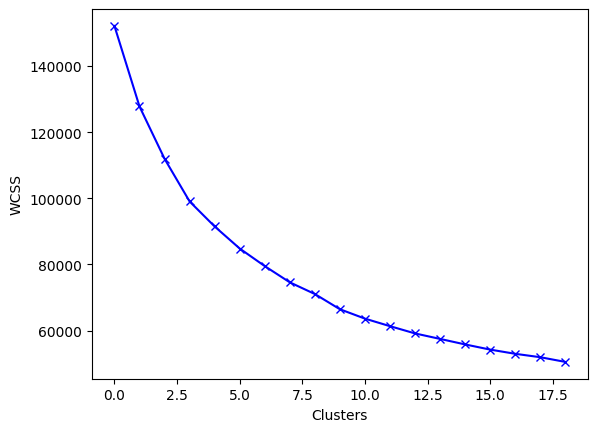

In [24]:
# Exibindo o valor do WCSS em relação ao número de clusters.
plt.plot(wcss_1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');


Após gerar o gráfico do método do cotovelo, observamos que a curva apresenta um comportamento de queda acentuada seguido de uma estabilização a partir do ponto **8**. Isso sugere que adicionar mais clusters além desse valor não resultará em ganhos significativos na redução da soma dos quadrados das distâncias entre os pontos de dados e os centróides. Assim, o **número ideal** de clusters para esse conjunto de dados parece ser **8**.

## Agrupamento com K-means

Para analisar e identificar padrões nos dados não rotulados dos nossos clientes, optarei pela utilização do algoritmo **K-Means**. Este algoritmo é conhecido por sua capacidade de agrupar os dados em clusters representados por centróides, minimizando a distância entre os pontos de dados e os centróides.

Essa abordagem nos permitirá obter uma compreensão mais profunda e holística do comportamento dos clientes, identificando segmentos específicos dentro da nossa base de clientes. Com isso, poderemos personalizar ofertas e estratégias de marketing de forma mais eficaz, atendendo às necessidades e preferências de cada segmento de forma mais precisa.

Além disso, a segmentação de clientes com o K-Means também nos auxiliará na melhoria da experiência do cliente, pois poderemos direcionar recursos e esforços para áreas específicas que impactam positivamente a satisfação e fidelização dos clientes. Com essa análise detalhada, estaremos mais preparados para tomar decisões estratégicas embasadas em dados, impulsionando o crescimento e sucesso do nosso negócio.

In [25]:
# Inicializa o KMeans com 8 clusters e um estado aleatório reproduzível (42).
kmeans = KMeans(n_clusters=8, random_state=42)

# Aplica o KMeans aos dados escalados.
kmeans.fit(base_scaled)

# Obtém os rótulos de cluster.
labels = kmeans.labels_

In [26]:
# Verificando se a divisão de labels foi feita da maneira correta e para todos os dados
labels, len(labels)

(array([0, 4, 3, ..., 7, 7, 7], dtype=int32), 8950)

In [27]:
# Verificando valores únicos e quantos clientes estão em cada label
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([2719,  420, 2013, 1104,  861, 1181,   30,  622]))

In [28]:
# Verificando os centros de clusterização
kmeans.cluster_centers_

array([[ 2.03108870e-02,  4.03802906e-01, -3.62180014e-01,
        -2.47372599e-01, -4.01789774e-01, -8.82535452e-02,
        -8.68094705e-01, -4.10851012e-01, -7.59096123e-01,
         1.13777783e-01, -2.13180448e-02, -4.87244770e-01,
        -3.04997664e-01, -2.49301418e-01,  3.21709691e-04,
        -4.57159697e-01,  2.72461662e-01],
       [ 9.19935407e-01,  4.67655287e-01,  2.25449078e+00,
         1.72111588e+00,  2.16875635e+00, -1.93345936e-01,
         1.16056707e+00,  1.55482581e+00,  1.24634100e+00,
        -3.09466958e-01, -2.09799089e-01,  2.78190077e+00,
         1.22524040e+00,  1.28391524e+00,  5.72797315e-01,
         2.88329286e-01,  3.34055749e-01],
       [-3.66925103e-01,  3.33430110e-01, -3.87320519e-02,
        -2.44358916e-01,  3.57162348e-01, -3.63669727e-01,
         9.89773379e-01, -3.87205057e-01,  1.20506635e+00,
        -4.75245803e-01, -3.61256671e-01,  1.86502252e-01,
        -2.61458077e-01, -2.18106620e-01, -3.94413497e-02,
         3.14541200e-01,  2.5

In [29]:
# Criando um DataFrame com os centros dos clusters encontrados pelo KMeans
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [base.columns])

# Exibindo esse DataFrame
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.020311,0.403803,-0.362180,-0.247373,-0.401790,-0.088254,-0.868095,-0.410851,-0.759096,0.113778,-0.021318,-0.487245,-0.304998,-0.249301,0.000322,-0.457160,0.272462
1,0.919935,0.467655,2.254491,1.721116,2.168756,-0.193346,1.160567,1.554826,1.246341,-0.309467,-0.209799,2.781901,1.225240,1.283915,0.572797,0.288329,0.334056
2,-0.366925,0.333430,-0.038732,-0.244359,0.357162,-0.363670,0.989773,-0.387205,1.205066,-0.475246,-0.361257,0.186502,-0.261458,-0.218107,-0.039441,0.314541,0.257535
3,-0.162727,0.392065,0.463859,0.606423,-0.017470,-0.333497,0.942522,1.877309,0.088993,-0.408096,-0.323290,0.528626,0.383463,0.093791,-0.156964,0.407630,0.261093
4,1.692382,0.392607,-0.217407,-0.155845,-0.227809,2.031269,-0.476040,-0.211474,-0.413794,1.929359,1.944499,-0.266016,1.032996,0.829435,0.519961,-0.390122,0.069603
5,-0.701236,-2.142837,-0.311152,-0.235718,-0.302542,-0.322027,-0.556270,-0.444004,-0.440134,-0.520975,-0.376187,-0.419765,-0.177685,-0.202286,-0.284646,0.281130,0.199336
6,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.127533,1.110132,0.310863
7,-0.336050,-0.347078,-0.289267,-0.215966,-0.286835,0.068284,-0.203078,-0.288661,-0.224549,0.308663,0.000996,-0.388117,-0.567159,-0.392680,-0.215888,0.014011,-3.203733


In [30]:
# Reverte a transformação dos dados para a escala original (reverti a padranização dos dados feita anteriormente)
cluster_centers = scaler.inverse_transform(cluster_centers)

# Cria um DataFrame com os centros dos clusters na escala original
cluster_centers = pd.DataFrame(data=cluster_centers, columns=[base.columns])

# Exibindo o DataFrame
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1606.750224,0.972928,229.401651,181.849522,47.734138,793.799306,0.141942,0.079893,0.062753,0.157912,3.103347,2.598750,3384.743165,1011.440675,845.657207,0.020003,11.881942
1,3479.242725,0.988054,5819.959145,3449.137221,2372.247102,573.415653,0.956142,0.666292,0.859765,0.073217,1.817102,83.857482,8952.375297,5449.952679,2181.049293,0.238046,11.964371
2,800.751198,0.956257,920.453208,186.851619,734.045124,216.238706,0.887594,0.086947,0.843362,0.040043,0.783515,19.345581,3543.157995,1101.746558,752.903429,0.245713,11.861966
3,1225.772313,0.970147,1994.245839,1598.975721,395.270118,279.512186,0.868630,0.762495,0.399805,0.053480,1.042611,27.849501,5889.643946,2004.660395,478.762633,0.272939,11.866727
4,5087.025175,0.970276,538.711140,333.766209,205.063151,5238.537198,0.299293,0.139371,0.199985,0.521229,16.518605,8.097674,8252.912262,4134.278183,2057.800744,0.039611,11.610465
5,104.910273,0.369652,338.424801,201.193870,137.482244,303.564554,0.267092,0.070003,0.189517,0.030892,0.681626,4.276037,3847.958886,1147.546130,180.924499,0.235940,11.784081
6,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
7,865.015978,0.795051,385.181720,233.977974,151.686061,1122.064941,0.408846,0.116344,0.275196,0.196911,3.255627,5.062701,2430.891398,596.373827,341.313370,0.157813,7.229904



Observamos que a segmentação em oito clusters proporcionou uma divisão eficaz dos dados, contudo, o número de clientes em alguns clusters foi relativamente baixo, como no caso do cluster 6, que possui apenas 30 clientes.

Isso sugere que investir em campanhas de marketing direcionadas a grupos pequenos pode não resultar em retornos financeiros satisfatórios, considerando o alto custo associado ao desenvolvimento de tais campanhas. Com poucos clientes-alvo, a taxa de adesão pode ser reduzida, impactando negativamente o lucro potencial.

Com o objetivo de otimizar a eficácia das campanhas de marketing, planejamos reduzir o número de clusters utilizando a técnica de Análise de Componentes Principais (PCA) para diminuir a dimensionalidade dos dados.

Essa abordagem visa criar um menor número de grupos para as campanhas direcionadas, garantindo assim uma distribuição mais equilibrada de clientes em cada cluster. Esperamos que essa estratégia aumente as chances de adesão e, consequentemente, melhore a lucratividade das campanhas. Os detalhes dessa abordagem estão disponíveis neste [notebook](https://colab.research.google.com/drive/).